<a href="https://colab.research.google.com/github/JunjieLeiCoe/ECON611/blob/master/lecture_03_regression_and_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sfa
from statsmodels.iolib.summary2 import summary_col
from progressbar import progressbar

import matplotlib.pyplot as plt
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

# Regression (OLS) with statsmodels

Statsmodels is the most mature and suitable package for estimating regressions. It has a "formula" interface similar to R and gives output similar to R (`lm`) or Stata `reg`. (Scikit-learn does not even give standard errors!)

The example below shows us estimating a model of the form

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

where $\epsilon \sim \text{Normal}(0, 1), X_1 \sim \text{Uniform(0,1)}, X_2 \sim \text{Uniform(0,1)}$, all independent.
=


In [0]:
# Minimal example of using statsmodels for regression

# Parameters of the data-generating process
N = 5000
alpha = 2 
beta_1 = 3
beta_2 = 0.1

# Generate data following a regression structure
X1 = np.random.uniform(size=N)
X2 = np.random.uniform(size=N)
Y = np.random.normal(loc=alpha + beta_1 * X1 + beta_2 * X2, size=N)

df = pd.DataFrame({
    'y': Y,
    'x1': X1,
    'x2': X2
})

# Fit the model
# The `formula` parameter has the pattern: 
# outcome_variable ~ explanatory variables (aka regressors).
r = sfa.ols(formula="y ~ x1 + x2", data=df).fit()

# Show results like Stata or R
print(r.summary())


# Access a dictionary of coefficient estimates
print(r.params)

# Access a dictionary of coefficient standard errors
print(r.bse)

# Access a dictionary of coefficient t-statistics (coefficient/standard error)
print(r.tvalues)

# Access a dictionary of coefficient p-values
print(r.pvalues)




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        03:41:22   Log-Likelihood:                -7116.2
No. Observations:                5000   AIC:                         1.424e+04
Df Residuals:                    4997   BIC:                         1.426e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0355      0.038     53.008      0.0

In [0]:
print(sfa.ols(formula="y ~ x1", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        03:44:01   Log-Likelihood:                -7116.2
No. Observations:                5000   AIC:                         1.424e+04
Df Residuals:                    4997   BIC:                         1.426e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0355      0.038     53.008      0.0

# More advanced statsmodels use

The example below shows how we can use the `C()` operator in a formula to create dummy variables. This is the same as `C()` in R or `i.varname` in Stata. This technique is very common in economics!

In [0]:
# Using "dummy variables"

# Parameters of the data-generating process
N = 1000
alpha = 2 
beta_1 = 3


# Generate data following a regression structure
# This DGP is a bit weird but there are no problems estimating it.
# Each value of Z is its own coefficient.
X1 = np.random.uniform(size=N)
Z = np.random.poisson(size=N)
Y = np.random.normal(loc=alpha + beta_1 * X1 + (Z ** 2), size=N)

df = pd.DataFrame({
    'y': Y,
    'x1': X1,
    'z': Z
})

# Fit the model
# The `formula` parameter has the pattern: 
# outcome_variable ~ explanatory variables (aka regressors).
# We can use C(variable) to turn categorical variables into dummy variables.
# Poisson variables take on integer values. See in the output that we get
# a coefficient for each distinct value of Z.
r = sfa.ols(formula="y ~ x1 + C(Z)", data=df).fit()

# Show results like Stata or R
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1848.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        03:26:35   Log-Likelihood:                -1404.9
No. Observations:                1000   AIC:                             2824.
Df Residuals:                     993   BIC:                             2858.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9398      0.071     27.306      0.0

# Estimating the ATE using OLS (ordinary least squares)

This argument sketches out why we can use a linear regression to estimate the ATE.

Suppose $Y^0$ and $Y^1$ are the potential outcome variables and $D$ is the treatment indicator. By definition the $ATE = E[Y^1] - E[Y^0]$.

Suppose we use OLS to fit a bivariate regression: 

$$Y = \beta_0 + \beta_1 D + \epsilon.$$

It can be shown (by linear algebra) that the OLS estimator is 

$$\mathbf{\hat{\beta}} = [\tfrac{1}{N_0}\displaystyle\sum_{i:D_i=0}Y_i, \tfrac{1}{N_1}\displaystyle\sum_{i:D_i=1}Y_i - \tfrac{1}{N_0}\displaystyle\sum_{i:D_i=0}Y_i].$$ 

*Yes! Linear regression can be used as a roundabout but convenient way of calculating two averages at once!*

This equation is an entirely mathematical property of regression which requires no statistical assumptions. It can be derived directly from OLS estimator's definition $\mathbf{\hat{\beta}} = [\mathbf{X'}\mathbf{X}]^{-1}\mathbf{X'Y}.$

In a causal inference context, this equation says: $\hat{\beta_0}$ is the average of $Y$ in the control group, and $\hat{\beta^1}$ is the difference in averages between the treatment group and control group.

Therefore, if the independence assumption holds, then 

$$E[\hat{\beta}] = [E[Y^0], ATE].$$ 

That is, under the independence assumption, the OLS estimator is an unbiased and consistent estimator of the control outcome and the average treatment effect.

## Binary outcome case

The above argument does not require any particular distribution for $(Y^1, Y^0)$. In particular, the argument holds when $(Y^1, Y^0)$ are binary 0/1 outcomes. In such a case the result translates to

$$E[\hat{\beta}] = [P(Y^0 = 1), P(Y^1 = 1) - P(Y^0 = 1) ] =  [P(Y^0 = 1), ATE].$$ 

## Linear probability model

The results above justify using the linear probability model (LPM) which is a linear regression where the outcome $Y$ is a binary 0/1 variable. This means we can use regression to accurately analyze experiment data, even if the outcome variable is 0/1 as in an A/B test on conversion rates.


This result generalizes to cases where we have a *saturated model* which means that we can exhaustively enumerate all groups our data. Concretely, in our regression we would include variables (0/1 "dummy variables") to identify each group (with one group omitted as a baseline for comparison). In a simple random experiment with treatment and control groups, this is the variable $D$ in the regression. With more groups we need to include additional variables, for example, $D^0, D^1$ and all products of these variables:

$$Y = \beta_0 + \beta_1 D^0 + \beta_2 D^1 + \beta_3 D^0 D^1 + \epsilon.$$

The LPM will consistently estimate all of $\beta_0=P(Y=1|D^0=0,D^1=1),\beta_1,\beta_2,\beta_3$. For example, 

$$\beta_3 = P(Y=1|D^0=1,D^1=1) - P(Y=1|D^0=0,D^1=1)$$.

In a causal context, these can be interpreted as treatment effects and effects of interacted treatments.

## Commentary on the LPM

The linear probability model is the subject of substantive debate. It is often contrasted with logit and probit models. Two major concerns are that the LPM (1) can predict invalid probabilities outside of $[0, 1]$ and (2) the regression's errors $\epsilon$ will be heteroskedastic.

Problem (2) can be fixed using robust standard errors. The technical section "Near equivalence of LPM and conventional statistical tests" shows that for practical sample sizes the LPM results are nearly identical to the standard statistical test for proportions, the chi-squared test.

Problem (1) goes away when we use a saturated model, as we often have when analyzing experiment results. For example, examine $\mathbf{\hat{\beta}}$ above in the simple case of just one treatment group. Clearly it is impossible for $\hat{\beta_0} + \hat{\beta_1} D$ to be outside $[0, 1]$ because it can only take values that are proportions within the sample.


<!-- Let $\mathbf{X}$ be the $n$-by-$k$ matrix of regressors. -->

<!-- Suppose $N$ is the sample size.  -->

# Near equivalence of LPM and conventional statistical tests

This simulation shows that the results from a LPM regression are nearly identical to those from R's `prop.test` [0], which implements the conventional chi-squared test for equality of proportions. When there are 2 groups (treatment and control) that test is identical to the one sometimes called a two-sample proportion $z$-test.

Once the combined sample size is into the thousands the results are nearly identical, including the $p$-value. At small sample sizes the LPM has slightly large $p$-values and standard errors on the ATE estimate. The chi-squared test more precise estimates and more power because it "knows" the binomial variance structure[link text](https://) whereas the LPM does not.

[0] https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/prop.test

In [0]:

N = 10000
P_Y0 = 0.35
ATE = 0
P_treatment = 0.5

Y0 = np.random.binomial(n=1, p=P_Y0, size=N)
Y1 = np.random.binomial(n=1, p=P_Y0 + ATE, size=N)
D = np.random.binomial(n=1, p=P_treatment, size=N)

df = pd.DataFrame({
    'y0': Y0,
    'y1': Y1,
    'd': D
})
df['y'] = df.eval("y1 * d + y0 * (1 - d)")

In [0]:
df.describe()

,y0,y1,d,y
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.353400,0.354400,0.499500,0.354800
std,0.478049,0.478355,0.500025,0.478477
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [0]:
# The parameter cov_type='HC1' uses the robust standard error estimator.
# This is important when estimating a LPM.
r = sfa.ols("y ~ d", data=df).fit(cov_type='HC1')
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.202
Date:                Tue, 10 Sep 2019   Prob (F-statistic):              0.273
Time:                        02:22:16   Log-Likelihood:                -6816.8
No. Observations:               10000   AIC:                         1.364e+04
Df Residuals:                    9998   BIC:                         1.365e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3600      0.007     53.059      0.0

In [0]:
# Import rpy2 which lets us use R functions in Python.
# This is useful because R has many statistical functions
# that we don't have in Python and these are more likely to
# be written by professional statisticians and be battle-proven.
from rpy2.robjects import IntVector, default_converter
from rpy2.robjects.packages import importr

stats = importr('stats')

def stats_prop_test(e1, e2, n1, n2):
  x = IntVector([e1, e2])
  ns = [n1, n2]
  n = IntVector(ns)
  n_array = np.array([n1, n2])
  
  # Recommended to not use continuity correction for large sample sizes:
  # https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity
  result = stats.prop_test(x=x, n=n, correct=False)
  z = result.rx('statistic')[0][0] ** 0.5
  r_estimate = result.rx('estimate')[0]
  estimates = np.array([r_estimate[0], r_estimate[1]])
  var = np.array(list(map(lambda p: p * (1 - p), estimates)))
  
  se = np.sqrt(np.divide(var, n_array))
  difference = estimates[1] - estimates[0]
  p_value = result.rx('p.value')[0][0]
  return {
      'estimates': estimates,
      'difference': difference,
      'se': se,
      'difference_se': np.sqrt((se ** 2).sum()),
      'z': z, 
      'p_value': p_value
  }

In [0]:

def compare_lpm_prop_test(
  N = 10000,
  P_Y0 = 0.35,
  ATE = 0.02,
  P_treatment = 0.5
):
  params = locals().copy()
  
  #treatment_units = np.random.choice(units, int(len(units) * share_treatment), replace=False)
  #df = pd.DataFrame({'i': units})
  ## Set the treatment units to have d_i = 1
  #df['d'] = df['i'].isin(treatment_units).astype('float')
  Y0 = np.random.binomial(n=1, p=P_Y0, size=N)
  Y1 = np.random.binomial(n=1, p=P_Y0 + ATE, size=N)
  D = np.random.binomial(n=1, p=P_treatment, size=N)

  units = np.arange(0, N)
  df = pd.DataFrame({
      'i': units,
      'y0': Y0,
      'y1': Y1,
  })
  treatment_units = np.random.choice(units, int(len(units) * P_treatment), replace=False)
  df['d'] = df['i'].isin(treatment_units).astype('float')
  df['y'] = df.eval("y1 * d + y0 * (1 - d)")

  # Get regression results
  result_reg = sfa.ols("y ~ d", data=df).fit(cov_type='HC1')
  #result_reg = sfa.ols("y ~ d", data=df).fit()

  # Get prop_test results
  result_prop_test = stats_prop_test(
      df.query("d==0")['y'].sum(),
      df.query("d==1")['y'].sum(),
      df.query("d==0")['y'].count(),
      df.query("d==1")['y'].count(),
  )
  diffs = {
      'difference': (result_reg.params['d'] - result_prop_test['difference']),
      'se': (result_reg.bse['d'] - result_prop_test['difference_se']),
      'p': (result_reg.pvalues['d'] - result_prop_test['p_value'])
  }
  diffs.update(params)
  return diffs


In [0]:
checks = pd.DataFrame([compare_lpm_prop_test(N=N) for _ in np.arange(0, 10) for N in np.arange(100, 20000, 500)])
checks.describe()

,ATE,N,P_Y0,P_treatment,difference,p,se
count,4.000000e+02,400.000000,4.000000e+02,400.0,4.000000e+02,400.000000,4.000000e+02
mean,2.000000e-02,9850.000000,3.500000e-01,0.5,1.504466e-18,0.000052,2.872905e-05
std,2.084275e-16,5778.926369,2.612292e-15,0.0,1.469516e-16,0.000360,1.530380e-04
min,2.000000e-02,100.000000,3.500000e-01,0.5,-5.065393e-16,-0.000370,3.489357e-07
25%,2.000000e-02,4975.000000,3.500000e-01,0.5,-7.285839e-17,-0.000015,5.360070e-07
50%,2.000000e-02,9850.000000,3.500000e-01,0.5,0.000000e+00,-0.000005,9.829092e-07
75%,2.000000e-02,14725.000000,3.500000e-01,0.5,6.938894e-17,0.000012,2.740034e-06
max,2.000000e-02,19600.000000,3.500000e-01,0.5,5.481726e-16,0.003335,1.007100e-03


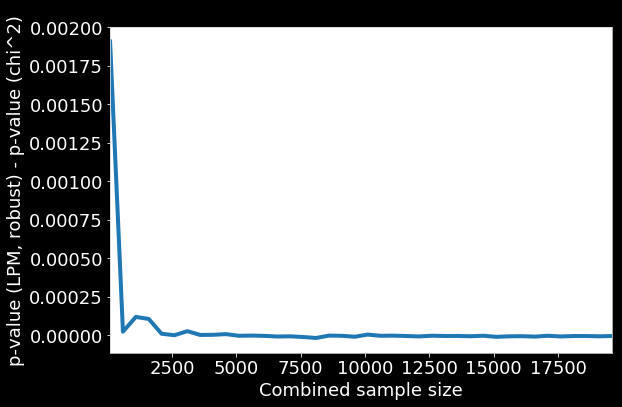

In [0]:
ax = checks.groupby('N')['p'].mean().plot(figsize=(9,6), linewidth=4)
ax.set_ylabel("p-value (LPM, robust) - p-value (chi^2)", fontsize=18)
ax.set_xlabel("Combined sample size", fontsize=18)
ax.set_title("Compare p-value on ATE estimate", fontsize=18)
ax.tick_params(labelsize=18)

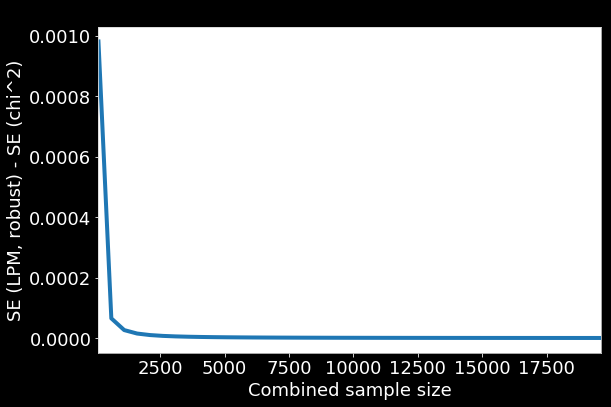

In [0]:
ax = checks.groupby('N')['se'].mean().plot(figsize=(9,6), linewidth=4)
ax.set_ylabel("SE (LPM, robust) - SE (chi^2)", fontsize=18)
ax.set_xlabel("Combined sample size", fontsize=18)
ax.set_title("Compare SEs on ATE estimate", fontsize=18)
ax.tick_params(labelsize=18)

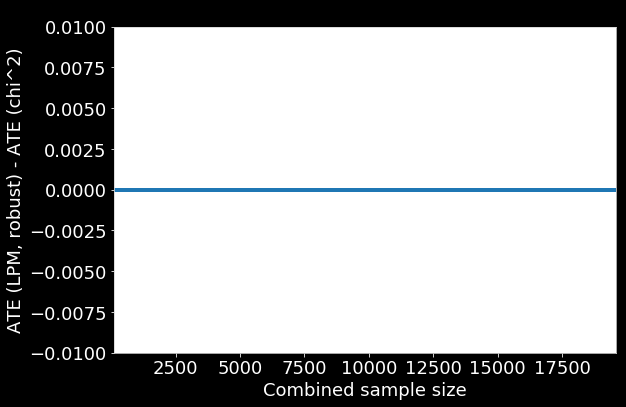

In [0]:
ax = checks.groupby('N')['difference'].mean().plot(figsize=(9,6), linewidth=4)
ax.set_ylabel("ATE (LPM, robust) - ATE (chi^2)", fontsize=18)
ax.set_xlabel("Combined sample size", fontsize=18)
ax.set_title("Compare ATE estimate", fontsize=18)
ax.set_ylim(-0.01, 0.01)
ax.tick_params(labelsize=18)

## Bonus: LPM vs Logit

The LPM vs. logit debate is a hot one. This result shows that for the case of a simple experiment
they will give us identical results. The advantage of the LPM is that the coefficents
are easier to interpret.

In [0]:

# Fit a logit model!
rlog = sfa.logit("y ~ d", data=df).fit()

# Add predicted probabilities back to the dataframe.
# Use both the LPM and logit results.
df['p_lpm'] = r.predict()
df['p_logit'] = rlog.predict()

# The predictions are identical!
assert(np.allclose(r.predict(), rlog.predict()))

# The means are all the same!
df.groupby(['d'])[['y', 'p_lpm', 'p_logit']].mean()

Optimization terminated successfully.
         Current function value: 0.646673
         Iterations 4


,y,p_lpm,p_logit
d,,,
0,0.345231,0.345231,0.345231
1,0.352311,0.352311,0.352311


# Reproducing results from a real field experiment

## Paper
"Getting to the Top of Mind: How Reminders Increase Savings" by Dean Karlan, Margaret McConnell, Sendhil Mullainathan, Jonathan Zinman. _Management Science_ 2016.

### Abstract
"We provide evidence from field experiments with three different banks that reminder messages increase commitment attainment for clients who recently opened commitment savings accounts. Messages that mention both savings goals and financial incentives are particularly effective, whereas other content variations such as gain versus loss framing do not have significantly different effects. Nor do we find evidence that receiving additional late reminders has an additive effect. These empirical results do not map neatly into existing models, so we provide a simple model where limited attention to exceptional expenses can generate undersaving that is in turn mitigated by reminders."

### Data and code
`https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UJD5OP`


## Summary
These development economists worked with banks in three countries to study savings behavior. Bank clients had new accounts with a target level of money saved, i.e., a savings goal. The study aimed to understand what can increase the probability that the clients would reach the goal by a pre-specified date. They ran a field experiment where clients were randomly assigned to (1) a *treatment condition* where the client received a text message to remind them about the savings goal or (2) a *control condition* with no reminder. 

The sample was 13,560 bank clients in Bolivia, Peru, and the Philippines.

A key finding from the study was that the reminder treatment increases the probability of reaching the savings goal by 3.2 percentage points (with a standard error of 0.009 percentage points). The authors declared this statistically significant with $p<0.01$. The overall percentage of clients that reached the savings goal was about 55 percent.

## Reproducing the results

Below is the main table of results from the paper. We will reproduce columns 3 and 4, which are regression results from a LPM. The outcome variable is whether or not the client reached the savings goal. "Panel A" shows the estimates treatment effects from the entire sample of data.

Fortunately the data and Stata do-files were shared at the Harvard Dataverse (see above). The data was already cleaned and prepared. We only need to translate their regression specification from Stata to Statsmodels.


![karlan_table_4](https://raw.githubusercontent.com/kyleco/kyleco.github.io/master/images/karlan_table_4.png)



In [0]:
# Load the data and check out the key variables
rem = pd.read_csv("https://raw.githubusercontent.com/kyleco/kyleco.github.io/master/data/analysis_dataallcountries.csv")

# We see that 55% of clients reached the goal and 61% received the reminder treatment.
print(rem[['reached_b4goal', 'rem_any']].mean())

reached_b4goal    0.553319
rem_any           0.611578
dtype: float64


In [0]:
# This is the paper's regression in Stata.

# local randfeature= "highint rewardint joint dc joint_single"
# local covariates = "female age highschool_completed married inc_7d wealthy hyperbolic spent_b4isaved saved_asmuch missing_female missing_age missing_highschool_completed missing_married missing_saved_asmuch missing_spent_b4isaved"

# Cols 3 and 4
# xi: reg reached_b4goal rem_any `randfeature' i.country, robust
# xi: reg reached_b4goal rem_any `covariates' `randfeature' i.depart i.provincia i.marketer i.branch i.country, robust



In [0]:
# Set up our variables
randfeature = "highint rewardint joint dc joint_single"
covariates = "female  highschool_completed married inc_7d wealthy hyperbolic spent_b4isaved saved_asmuch missing_female missing_age missing_highschool_completed missing_married missing_saved_asmuch missing_spent_b4isaved"

Xrandfeature = "+".join(randfeature.split())
Xfull = "+".join(randfeature.split() + covariates.split())

# NOTE: In a LPM in Statsmodels the outcome has to be a float!
# It will complain if this is an int!
rem['reached_b4goal'] = rem['reached_b4goal'].astype('float')
rem['female'] = rem['female'].astype('float')



formula_col3 = "reached_b4goal ~ rem_any + {Xs} + C(country)".format(Xs=Xrandfeature)
r_col3 = sfa.ols(formula_col3, data=rem).fit(cov_type='HC1')

formula_col4 = "reached_b4goal ~ rem_any + {Xs} + C(depart) + C(provincia) + C(marketer) + C(branch) + C(country)".format(Xs=Xfull)
r_col4 = sfa.ols(formula_col4, data=rem).fit(cov_type='HC1')

# Let's do a really simple model with only country dummies as controls
formula_simple = "reached_b4goal ~ rem_any + C(country)"
r_simple = sfa.ols(formula_simple, data=rem).fit(cov_type='HC1')

# Simplest possible model. Bivariate!
formula_biv = "reached_b4goal ~ rem_any"
r_biv = sfa.ols(formula_biv, data=rem).fit(cov_type='HC1')


In [0]:
print(r_biv.summary())

                            OLS Regression Results                            
Dep. Variable:         reached_b4goal   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.693
Date:                Tue, 10 Sep 2019   Prob (F-statistic):            0.00555
Time:                        03:35:11   Log-Likelihood:                -9760.3
No. Observations:               13560   AIC:                         1.952e+04
Df Residuals:                   13558   BIC:                         1.954e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5384      0.007     78.381      0.0

In [0]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:0.4f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}",
           'No. coefficients': lambda x: f"{x.params.shape[0]}"
          }

results_table = summary_col(results=[r_col3, r_col4, r_simple, r_biv],
                            float_format='%0.6f',
                            stars = True,
                            model_names=[
                                'Column 3\n(in paper)',
                                'Column 4\n(in paper)',
                                'Only country controls\n(not in paper)',
                                'Simplest possible\n(not in paper)'
                            ],
                            info_dict=info_dict,
                            regressor_order=['rem_any'],
                            drop_omitted=True)

print("Reproducing table 4 in Karlan et al. 2016")
print(results_table)

Reproducing table 4 in Karlan et al. 2016

                   Column 3    Column 4  Only country controls Simplest possible
                  (in paper)  (in paper)     (not in paper)      (not in paper) 
--------------------------------------------------------------------------------
rem_any          0.031855*** 0.031731*** 0.031593***           0.024317***      
                 (0.009153)  (0.008946)  (0.009125)            (0.008767)       
R-squared        0.0671      0.1096      0.0668                0.0006           
No. observations 13560       13560       13560                 13560            
No. coefficients 9           62          4                     2                
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Why is the simplest model so different?

The estimate from the simple model is only 0.024 whereas the others were all about 0.032. Why is this?

The table below shows that the the treatment proportions were much higher in Bolivia and the Philippines *and* they very different overall goal achievement rates. The treatment group has disproporionately more Bolivians, who have a much higher baseline goal achievement rate.

This means that the independence assumption is probably not true. The treatment $D$ is correlated with country which is correlated with goal achievement. The second table shows this is true even for the non-treated baseline. As a result our usual approach does not work!

This is due to the randomization process being handled differently within each country. However, we can probably assume the *conditional independence assumption*

$$(Y^1, Y^0) \perp D | S$$

where $S$ is country. This assumption means we can still estimate the ATE, but we need to account for $S$ in our analysis. We do that by including country as a regression. The results show that once we do that the estimates are very stable even when we include other control variables.

In [0]:
rem.groupby('country')[['rem_any', 'reached_b4goal']].agg(['count', 'mean'])

rem_any           reached_b4goal          
          count      mean          count      mean
country                                           
1          2775  0.877838           2775  0.690811
2          9376  0.501280           9376  0.564420
3          1409  0.821150           1409  0.208659

In [0]:
rem.groupby(['country', 'rem_any'])['reached_b4goal'].mean().unstack(1)

rem_any,0,1
country,,
1,0.657817,0.695402
2,0.548118,0.580638
3,0.198413,0.210890


## Commentary on the standard errors and covariates

Above we reproduced columns 3 and 4 of the paper. Column 3 is a model that has the treatment `rem_any` and 7 other control variables. Column 4 is a model with the treatment and 60 other control variables! 

Adding all of those additional covariates increased the R-squared from 0.0671 to 0.1096. This means the model was originally explained about 6.7% of the variation in $Y$ but the additional covariates allow it explain 11% of the variation.

The standard error on the estimate of the treatment effect fell from 0.009153 to 0.008946, a drop of about 2.3 percent. Standard errors are proportional to the unexplained variation in the data (loosely speaking), so we expect the standard errors to fall as the R-squared increases.

I also tried removing covariates from the model giving us the model "Only country controls". However, this had very little effect on the results because covariates removed had minimal explanatory power. The R-squared only fell slightly to 0.0668. 

# Classic blocking example: Shoe technology experiment

This is a classic example of the most extreme case of blocking: a paired experiment.

The story is that Nike is testing a new compound for the soles of shoes that is supposed to reduce wear (with no negative effects on traction!). The engineers are doing an experiment to estimate the performance of the new compound. The outcome of interest $Y$ is a normally distributed "wear" measurement taken on the shoes after 1 month.

This simulation demonstrates two ways of conducting the experiment. There are $N=100$ people available for the experiment, each with 2 feet. So there are 200 shoes in the experiment.

- A completely randomized design: Half of the shoes will have the new technology and half will not. The randomization is complete so it is possible for there to be more treated left shoes than right shoes or the reverse.

- A paired (blocked) design: Each person receives one treated shoe and one control shoe.

In the paired design each person effectively serves as their own control group! This is important when there is high *heterogeneity* between the people. Some people may be stronger, heavier, or more active which increases the wear on the shoe. We model this by a "wear rate" $r$ in the simulation. In the un-paired design it is possible by chance to end up with a treatment/control split that happens to randomly put more high $r$ people in one group. This tends to increase the variability in the estimate of the ATE. In the paired design we always have a perfect balance of $r$ across the treatment and control groups because each person is  in both groups. This reduces the extraneous variability which is effectively just noise added to our estimate of the ATE.


In [0]:
def gen_shoe_data(N, block=False, person_variability=5):

  # Make N people each with their own randomly wear rate in [0, person_variability].
  people = np.arange(0, N)
  r_person = np.random.uniform(0, person_variability, size=N)
  
  # Make left and right feet
  df_left = pd.DataFrame({'i': people})
  df_left['left_foot'] = 1
  df_right = pd.DataFrame({'i': people})
  df_right['left_foot'] = 0 
  df = pd.concat([df_left, df_right], axis=0)
  df['shoe'] = np.arange(0, df.shape[0])
  
  # Each of the person's feet will have the same Y0 (success probability)
  df['r_y0'] = r_person[df['i']]
  
  # Treatment reduces wear rate by 0.20
  ATE = -0.20
  # Y outcomes are measures of shoe wear
  Y0 = np.random.normal(loc=df['r_y0'])
  Y1 = np.random.normal(loc=df['r_y0'] + ATE)
  df['y0'] = Y0
  df['y1'] = Y1
  
  P_treatment = 0.5
  if block == False:
    treatment_shoes = np.random.choice(df['shoe'], int(len(df['shoe']) * P_treatment), replace=False)
    df['d'] = df['shoe'].isin(treatment_shoes).astype('float')
  else:
    # Treat left foot only
    # In real life we would treat a random foot.
    # Wouldn't do this in real life but it doesn't matter for the simulation.
    df['d'] = df['left_foot']
         
  df['y'] = df.eval("y1 * d + y0 * (1 - d)")
  del df['y0']
  del df['y1']
  return df

def estimate_ate(df):
  means = df.groupby('d')['y'].mean()
  return {'estimated_ate': means[1] - means[0]}


def regression_ate(df, formula="y ~ d + r_y0"):
  r = sfa.ols(formula, df).fit()
  return {
      'estimated_ate': r.params['d'],
      'estimated_ate_se': r.bse['d']
  }

In [0]:
# Generate simulated data sets without blocking and with blocking
B = 500
inter_person_variability = 5
# Generate simulated data sets without blocking and with blocking
noblock = [gen_shoe_data(100, False, inter_person_variability) 
      for _ in progressbar(np.arange(0, B))]
block = [gen_shoe_data(100, True, inter_person_variability) for _ in progressbar(np.arange(0, B))]
# Estimate the ATE of each data set
m_noblock = pd.DataFrame([estimate_ate(d) for d in progressbar(noblock)])
m_block = pd.DataFrame([estimate_ate(d) for d in progressbar(block)])
# Show results
results = pd.concat([
    m_noblock['estimated_ate'].describe(),
    m_block['estimated_ate'].describe()
], axis=1)
results.columns = ['noblock', 'block']
results

100% (500 of 500) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (500 of 500) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,noblock,block
count,500.000000,500.000000
mean,-0.209683,-0.201662
std,0.241821,0.136555
min,-0.862596,-0.584795
25%,-0.363962,-0.291297
50%,-0.214061,-0.209528
75%,-0.068306,-0.111478
max,0.652038,0.200380


Text(0.5, 1.0, 'Sampling distribution of estimated ATE\n(non-blocking experiment)')

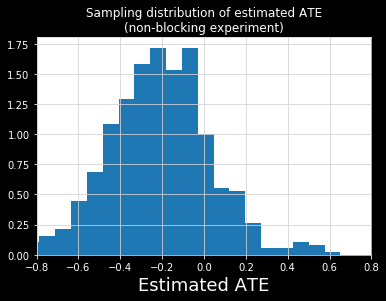

In [0]:
ax = m_noblock['estimated_ate'].hist(bins=20, density=True)
ax.set_xlim(-0.8, 0.8)
ax.set_xlabel("Estimated ATE", fontsize=18)
ax.set_title("Sampling distribution of estimated ATE\n(non-blocking experiment)", color='white')
#m_block['estimated_ate'].describe()

Text(0.5, 1.0, 'Sampling distribution of estimated ATE\n(blocking experiment)')

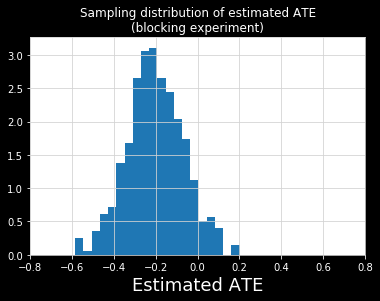

In [0]:
ax = m_block['estimated_ate'].hist(bins=20, density=True)
ax.set_xlim(-0.8, 0.8)
ax.set_xlabel("Estimated ATE", fontsize=18)
ax.set_title("Sampling distribution of estimated ATE\n(blocking experiment)", color='white')
#m_block['estimated_ate'].describe()

In [0]:
print(sfa.ols("y ~ d + r_y0", block[0]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.73e-54
Time:                        07:10:27   Log-Likelihood:                -264.00
No. Observations:                 200   AIC:                             534.0
Df Residuals:                     197   BIC:                             543.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2758      0.141      1.956      0.0

In [0]:
print(sfa.ols("r_y0 ~ d", noblock[1]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   r_y0   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.112
Date:                Mon, 09 Sep 2019   Prob (F-statistic):              0.148
Time:                        07:10:46   Log-Likelihood:                -364.74
No. Observations:                 200   AIC:                             733.5
Df Residuals:                     198   BIC:                             740.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7214      0.151     18.065      0.0

In [0]:
noblock[1].groupby('i')['r_y0'].std()

i
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: r_y0, dtype: float64

In [0]:

def gen_shoe_data_x(N, block=False, person_variability=5):

  # Make N people each with their own randomly wear rate in [0, person_variability].
  people = np.arange(0, N)
  r_person = np.random.uniform(0, person_variability, size=N)
  
  # Make left and right feet
  df_left = pd.DataFrame({'i': people})
  df_left['left_foot'] = 1
  df_right = pd.DataFrame({'i': people})
  df_right['left_foot'] = 0 
  df = pd.concat([df_left, df_right]*5, axis=0)
  df['shoe'] = np.arange(0, df.shape[0])
  
  # Each of the person's feet will have the same Y0 (success probability)
  df['r_y0'] = r_person[df['i']]
  
  # Treatment reduces wear rate by 0.20
  ATE = -0.20
  # Y outcomes are measures of shoe wear
  Y0 = np.random.normal(loc=df['r_y0'])
  Y1 = np.random.normal(loc=df['r_y0'] + ATE)
  df['y0'] = Y0
  df['y1'] = Y1
  
  P_treatment = 0.5
  if block == False:
    treatment_shoes = np.random.choice(df['shoe'], int(len(df['shoe']) * P_treatment), replace=False)
    df['d'] = df['shoe'].isin(treatment_shoes).astype('float')
  else:
    # Treat left foot only
    # In real life we would treat a random foot.
    # Wouldn't do this in real life but it doesn't matter for the simulation.
    df['d'] = df['left_foot']
         
  df['y'] = df.eval("y1 * d + y0 * (1 - d)")
  del df['y0']
  del df['y1']
  return df

def estimate_ate(df):
  means = df.groupby('d')['y'].mean()
  return {'estimated_ate': means[1] - means[0]}


def regression_ate(df, formula="y ~ d + r_y0"):
  r = sfa.ols(formula, df).fit()
  return {
      'estimated_ate': r.params['d'],
      'estimated_ate_se': r.bse['d']
  }

noblock = [gen_shoe_data_x(20, False, 20) for _ in progressbar(np.arange(0, B))]
#


100% (500 of 500) |######################| Elapsed Time: 0:00:05 Time:  0:00:05


In [0]:
m_noblock = pd.DataFrame([regression_ate(d, "y~d+C(i)") for d in progressbar(noblock)])
m_noblock.describe()

100% (500 of 500) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


,estimated_ate,estimated_ate_se
count,500.000000,500.000000
mean,-0.199466,0.148814
std,0.144135,0.008321
min,-0.605934,0.128990
25%,-0.289438,0.143400
50%,-0.203795,0.148517
75%,-0.105220,0.154278
max,0.228152,0.175019


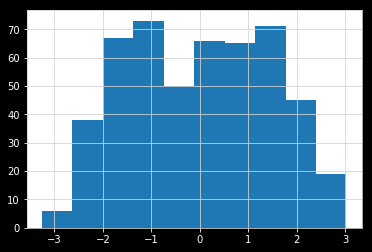

In [0]:
m_noblock['estimated_ate'].hist()